# Data Cleaning and Exploratory Data Analysis (EDA)

This notebook performs data cleaning and exploratory data analysis (EDA) on the cruise ship dataset. It includes a function to clean the data for both Vessel 1 and Vessel 2, which can then be used in other notebooks for specific analyses.




**Note:** If you are interested in the EDA, please go below to the EDA section to run the cells. 
For data cleaning, please run the section below  sections (this cell should be executed compulsorly for the further process).


### Data Cleaning Function

We will take the help a function clean_data from utilities that takes in the raw data and returns cleaned data for Vessel 1 and Vessel 2.

#### Instructions:
1. Please set the correct path for the dataset file in the cell below.
2. Ensure that the file path is correct for your local system.

In [ ]:
file_path = r"C:\Users\jeeva\Downloads\Cruises_performance_analysis\Cruise_ship_analysis\data\data.csv"

In [ ]:
# Import necessary utilities.py for helper functions

from utilities import *

# Define the necessary columns and date columns
necessary_columns = [
    'Start Time', 'End Time', 'Vessel Name',
    'Power Galley 1 (MW)', 'Power Galley 2 (MW)', 'Power Service (MW)',
    'HVAC Chiller 1 Power (MW)', 'HVAC Chiller 2 Power (MW)', 'HVAC Chiller 3 Power (MW)',
    'Scrubber Power (MW)', 'Sea Temperature (Celsius)',
    'Boiler 1 Fuel Flow Rate (L/h)', 'Boiler 2 Fuel Flow Rate (L/h)',
    'Incinerator 1 Fuel Flow Rate (L/h)', 'Diesel Generator 1 Power (MW)',
    'Diesel Generator 2 Power (MW)', 'Diesel Generator 3 Power (MW)',
    'Diesel Generator 4 Power (MW)',
    'Speed Over Ground (knots)', 'Speed Through Water (knots)',
    'Propulsion Power (MW)', 'Port Side Propulsion Power (MW)',
    'Starboard Side Propulsion Power (MW)', 'Bow Thruster 1 Power (MW)',
    'Bow Thruster 2 Power (MW)', 'Bow Thruster 3 Power (MW)',
    'Stern Thruster 1 Power (MW)', 'Stern Thruster 2 Power (MW)',
    'Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)',
    'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)'
]

date_columns = ['Start Time', 'End Time']

# Load the dataset
data = load_data(file_path)

data =filter_columns(data, necessary_columns)


# Clean the data
vessel1_data_cleaned = clean_data(data[data['Vessel Name'] == 'Vessel 1'], necessary_columns, date_columns)
vessel2_data_cleaned = clean_data(data[data['Vessel Name'] == 'Vessel 2'], necessary_columns, date_columns)



# Save the cleaned data to CSV files for use in other notebooks
vessel1_data_cleaned.to_csv('../data/vessel1_cleaned.csv', index=False)
vessel2_data_cleaned.to_csv('../data/vessel2_cleaned.csv', index=False)

print("Data cleaning complete. Cleaned data saved for Vessel 1 and Vessel 2.")


### Exploratory Data Analysis (EDA)




#### Instructions:
1. Please set the correct path for the dataset file in the cell below.
2. Ensure that the file path is correct for your local system.

The following cells will perform EDA on the data for both vessels. The analysis includes:
1. Plotting the number of missing values per column.
2. Plotting histograms for numerical columns.
3. Plotting boxplots for numerical columns.
4. Creating a correlation heatmap.

In [5]:
file_path = r"C:\Users\jeeva\Downloads\Cruises_performance_analysis\Cruise_ship_analysis\data\data.csv"

Data loaded successfully.


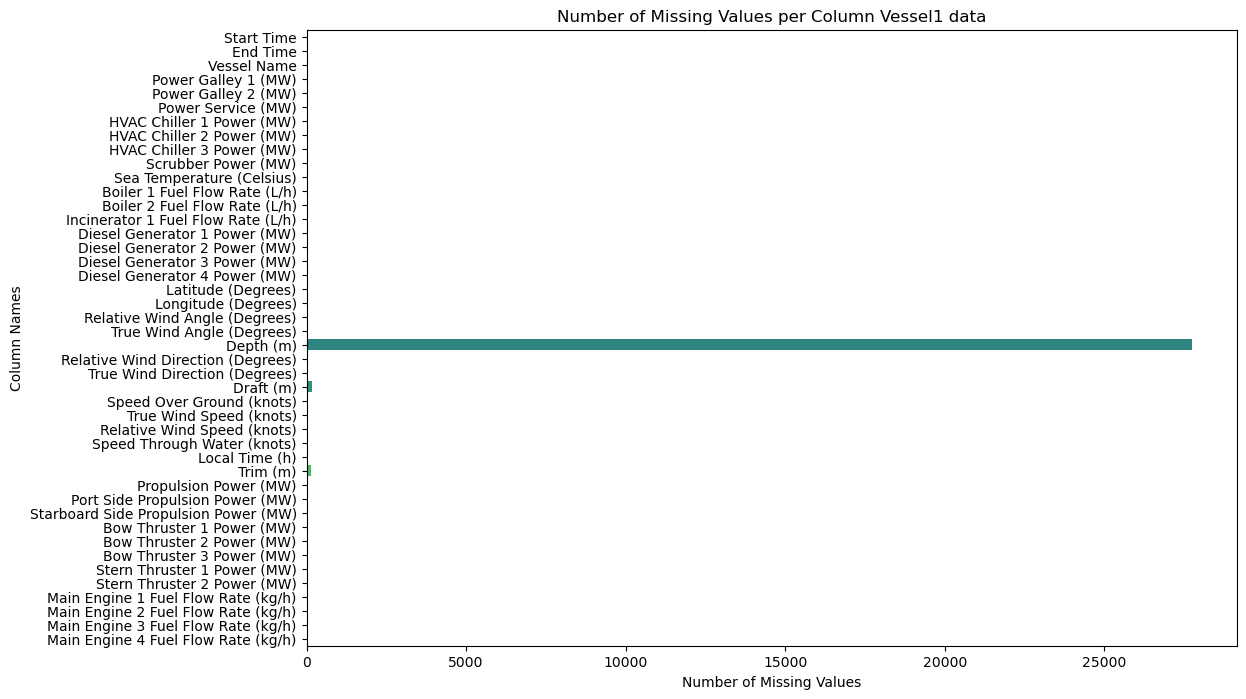

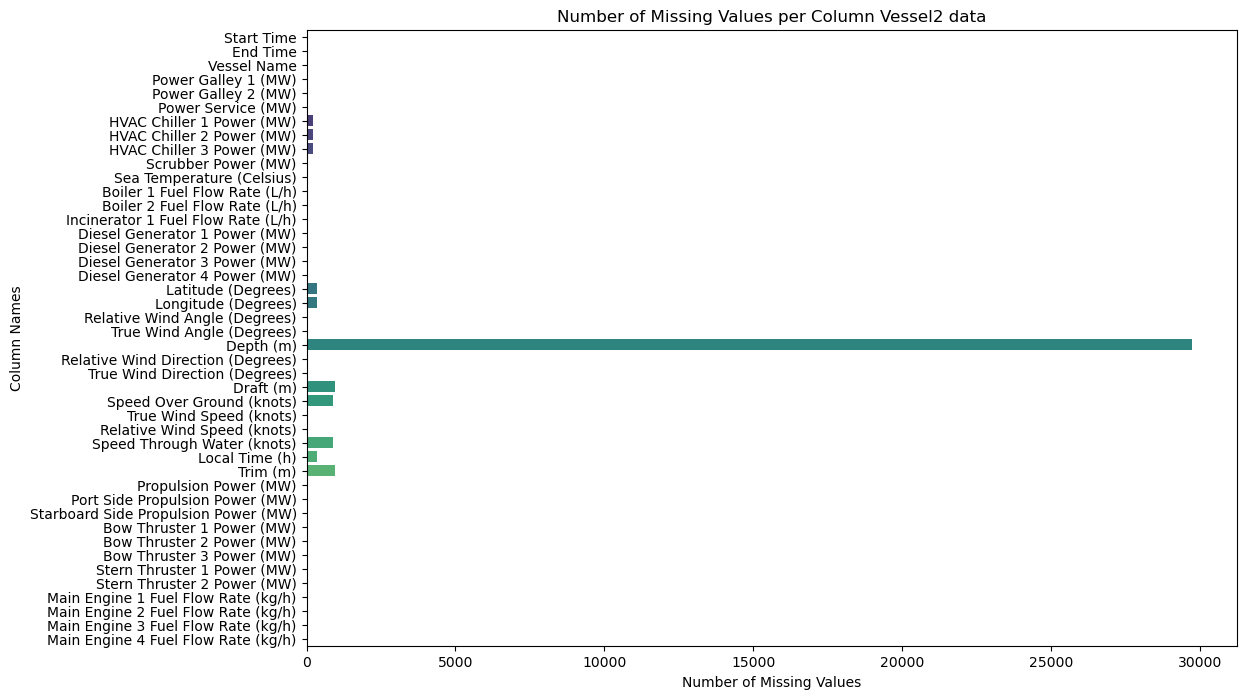

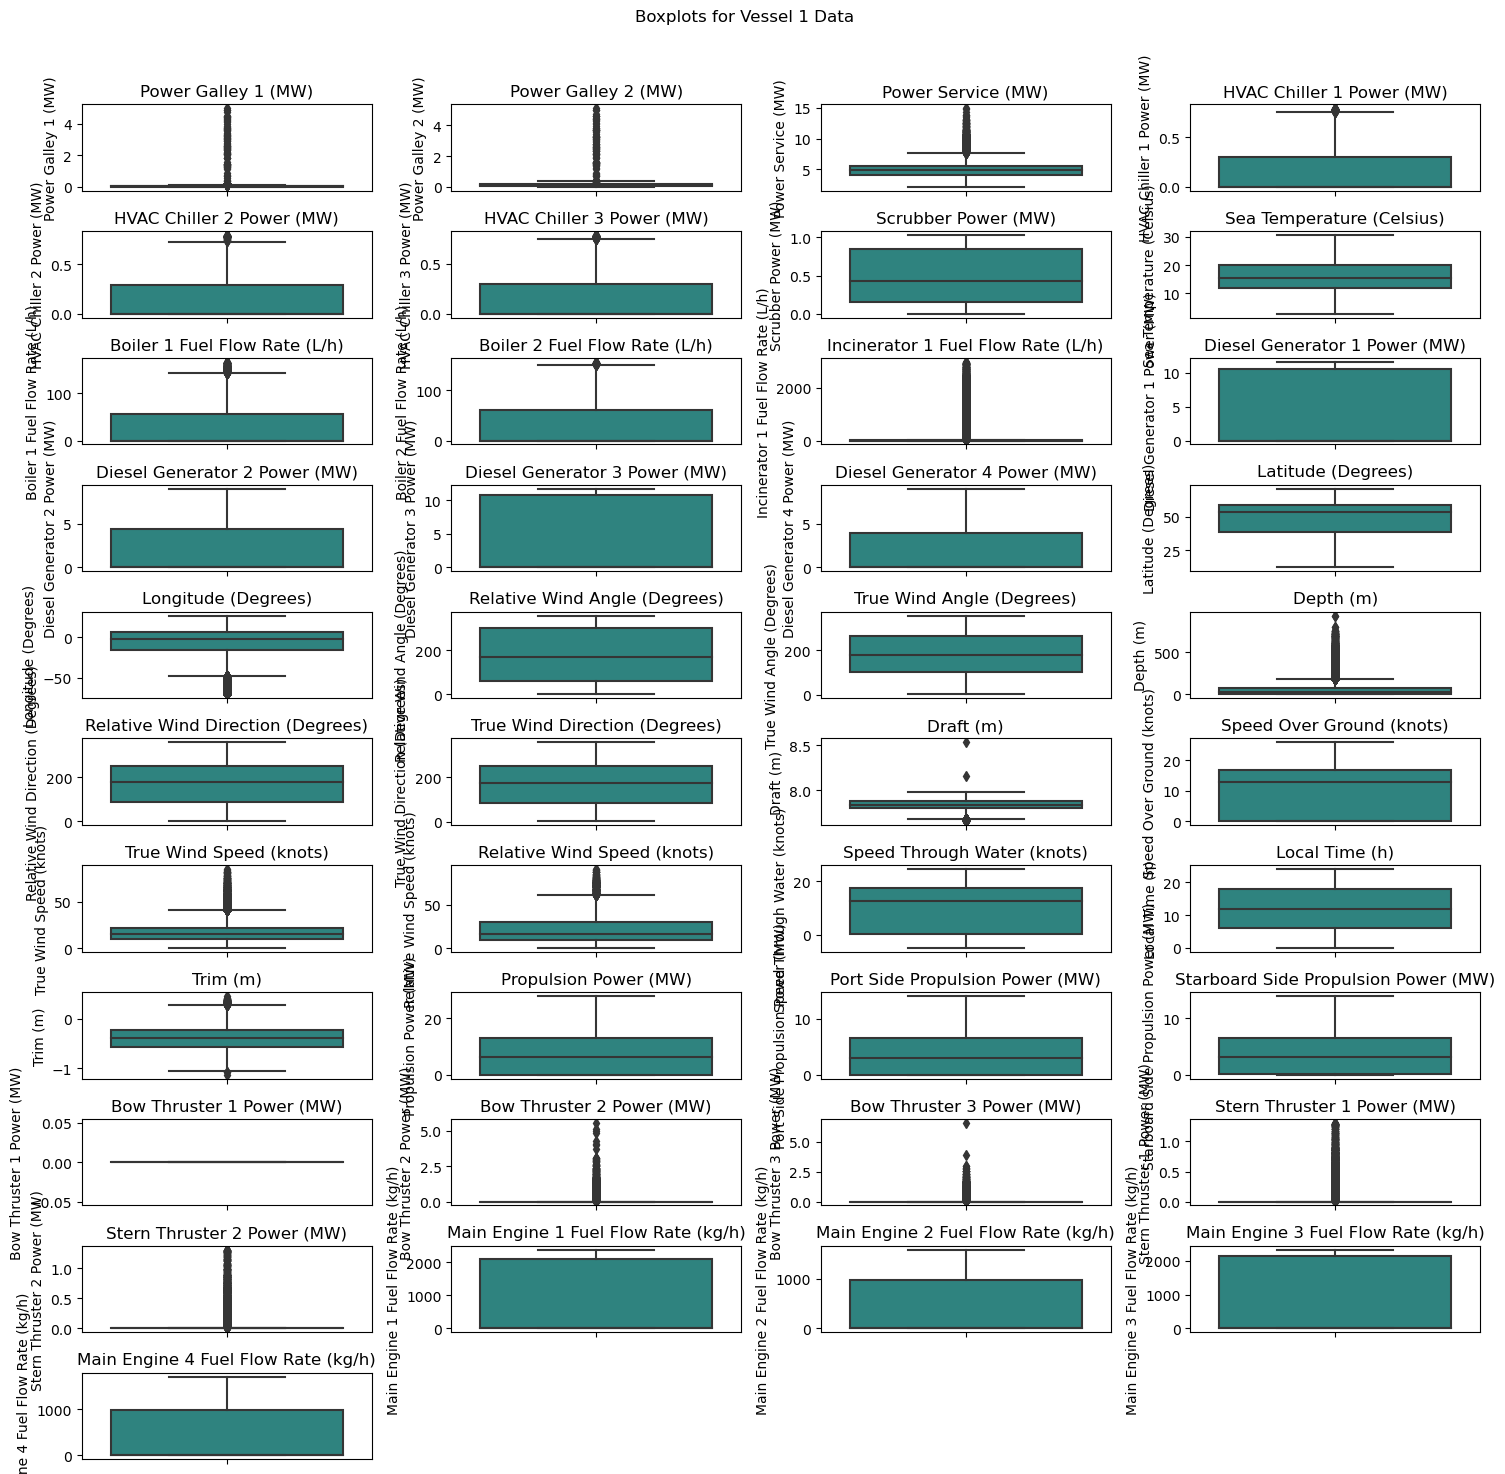

c:\Users\jeeva\Downloads\Cruises_performance_analysis\Cruise_ship_analysis\Scripts\utilities.py:130: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})


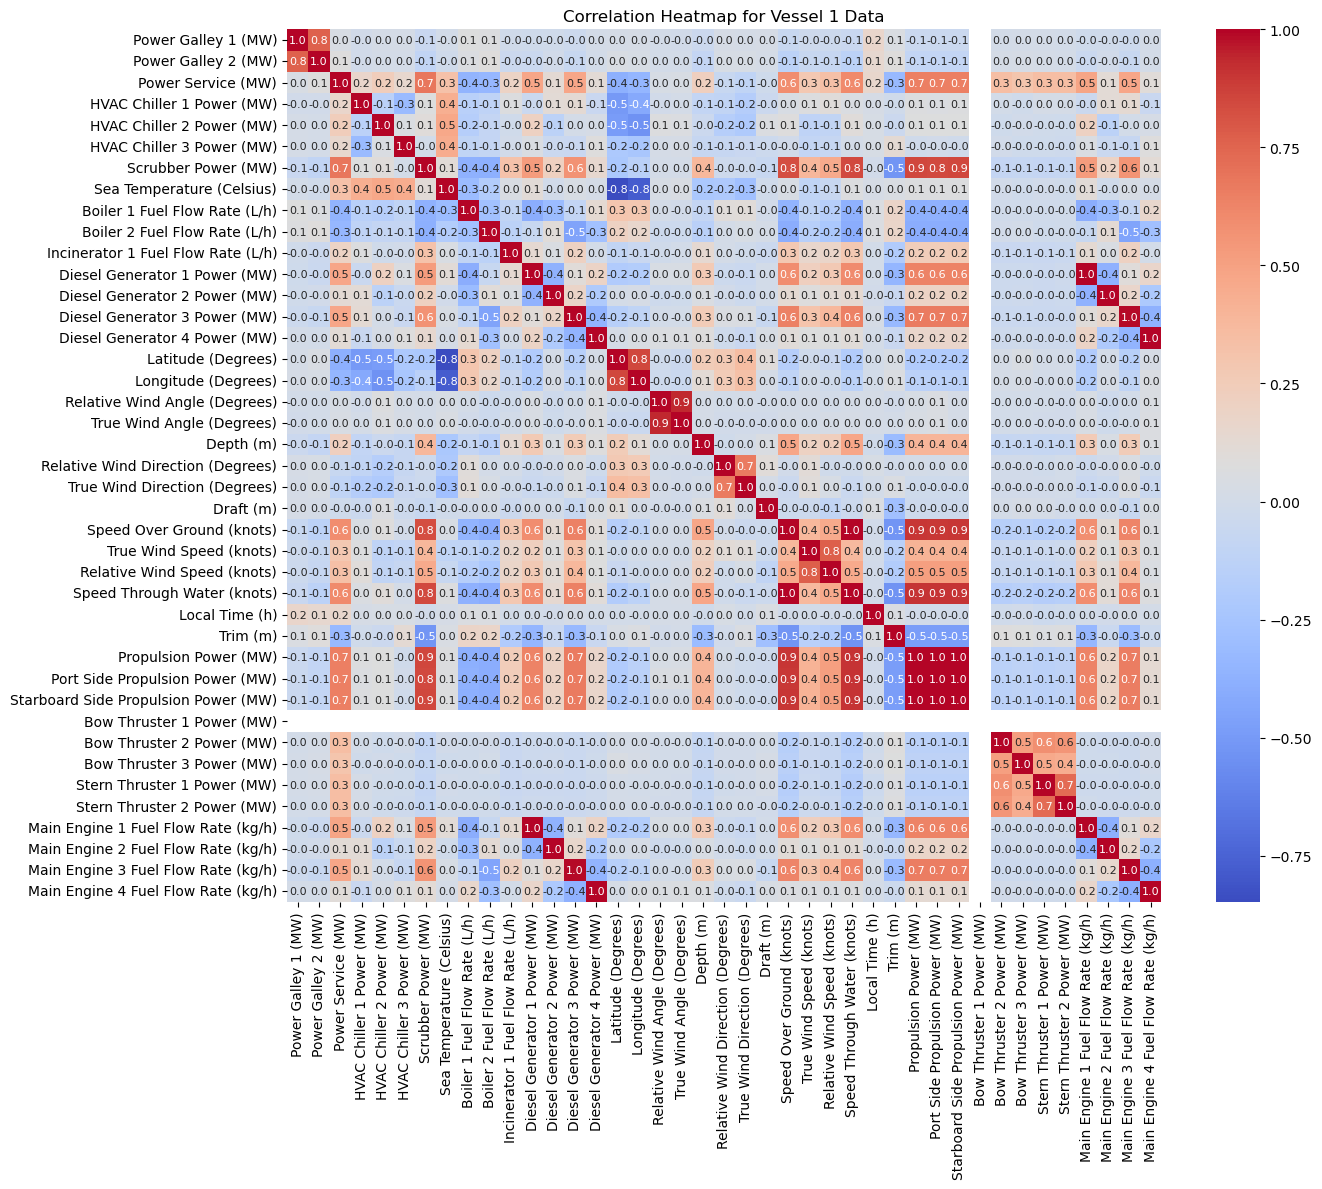

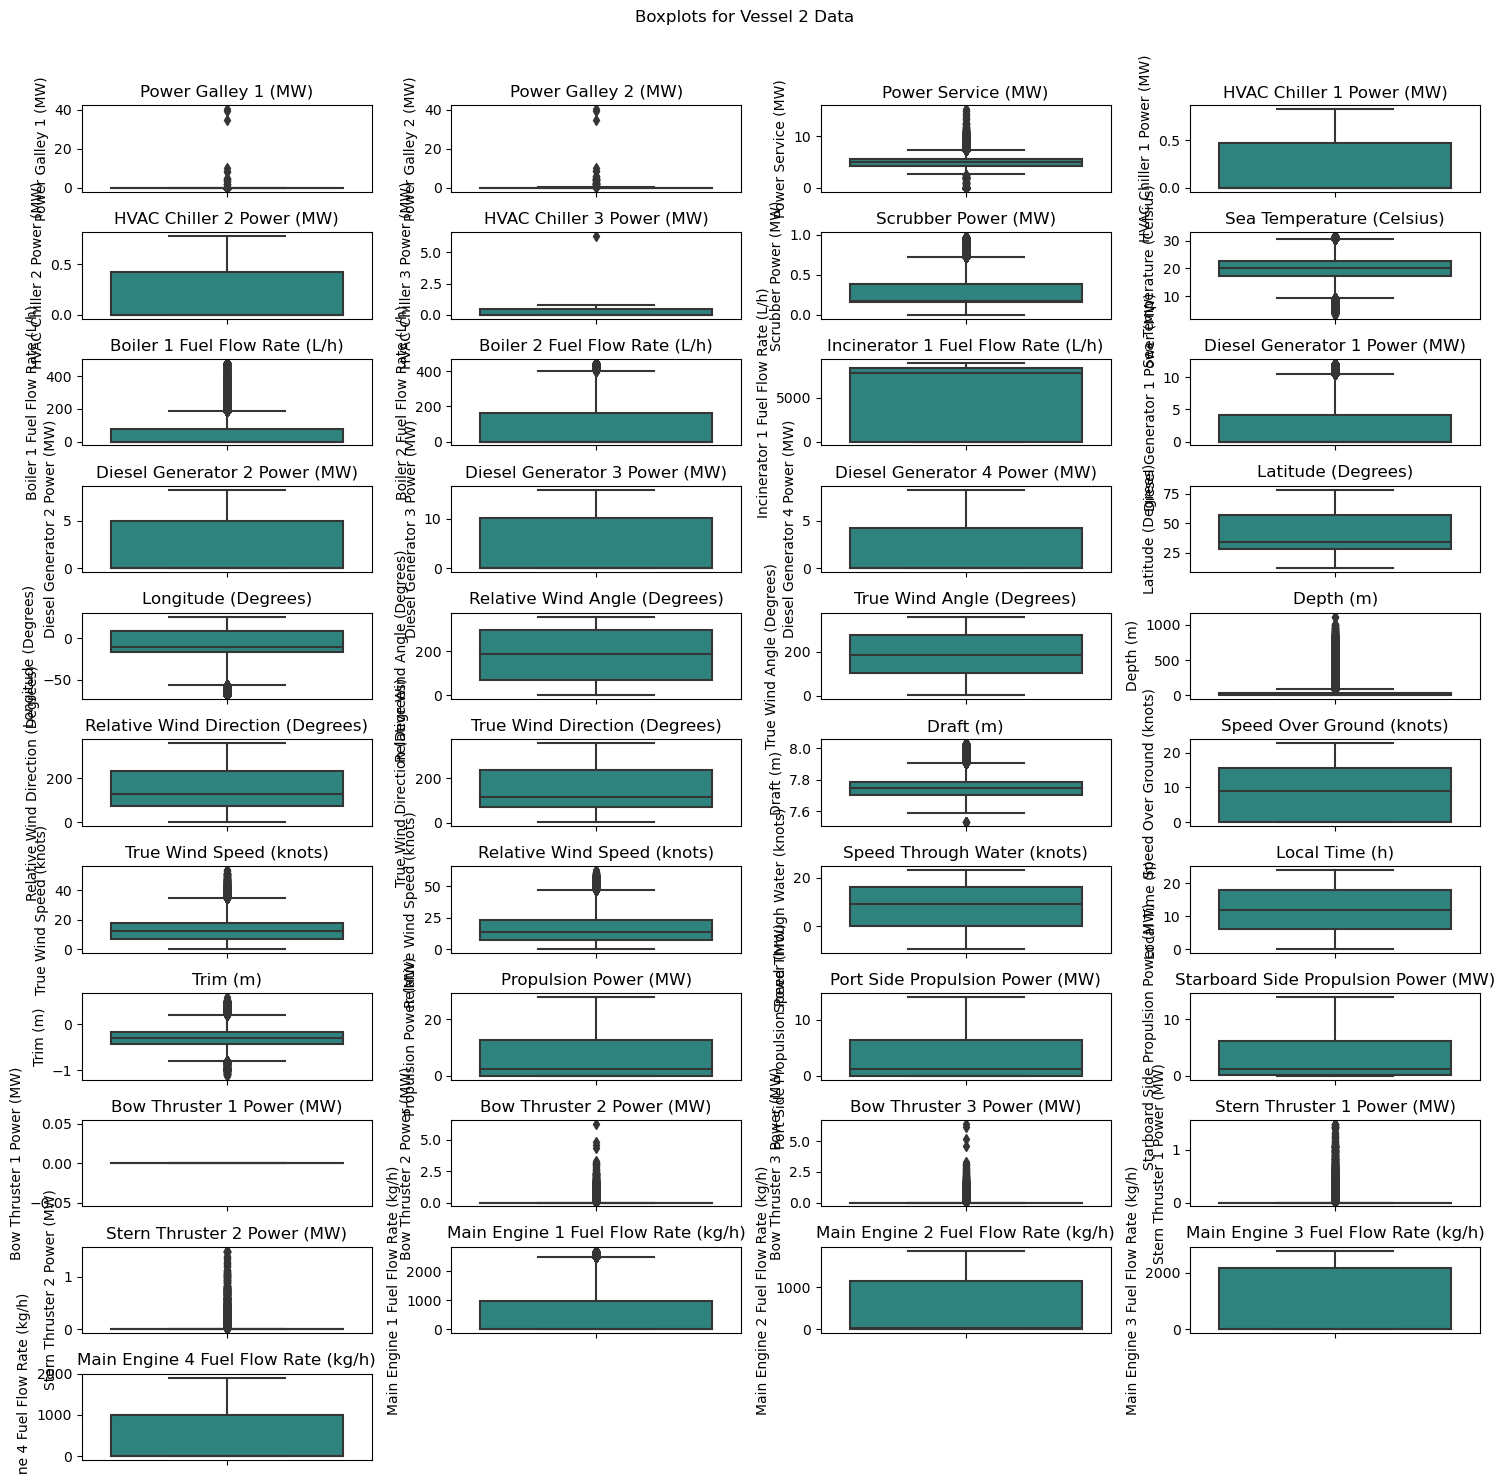

c:\Users\jeeva\Downloads\Cruises_performance_analysis\Cruise_ship_analysis\Scripts\utilities.py:130: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})


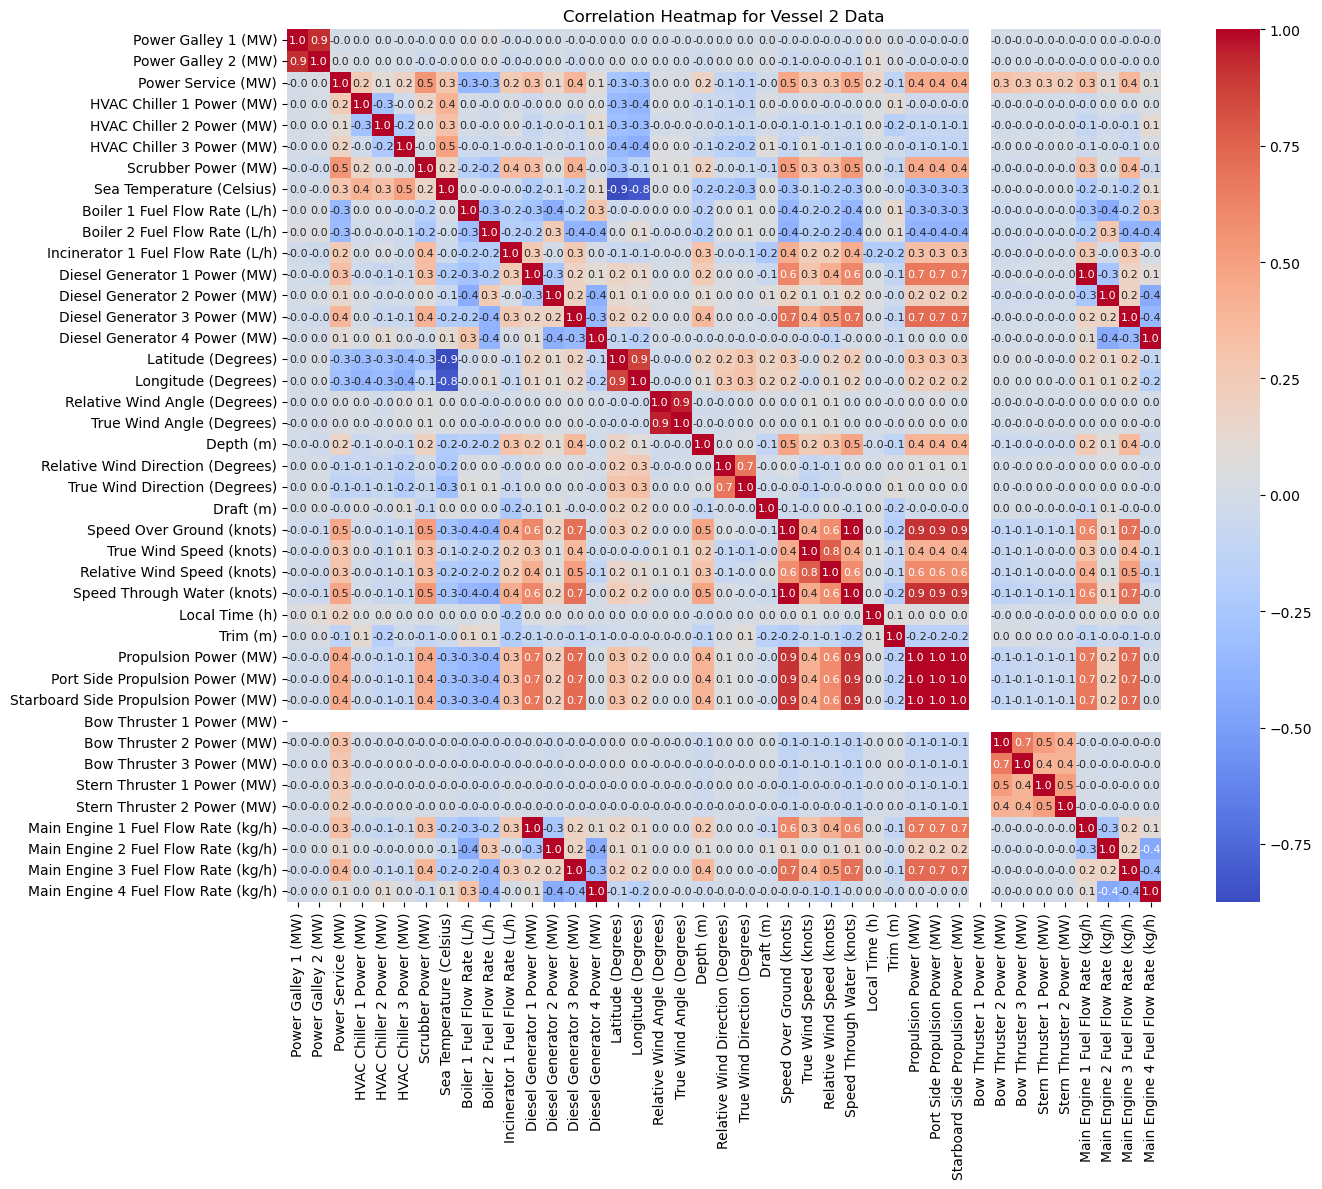

In [6]:

# Import necessary utilities.py for helper functions

from utilities import *



# Load the dataset
try:
    data = load_data(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

# Clean the data
vessel1_data = data[data['Vessel Name'] == 'Vessel 1']
vessel2_data= data[data['Vessel Name'] == 'Vessel 2']

# Perform EDA for vessel 1
plot_missing_values(vessel1_data, 'Number of Missing Values per Column Vessel1 data')
# Perform EDA for vessel 2
plot_missing_values(vessel2_data, 'Number of Missing Values per Column Vessel2 data')

# Plotting for Vessel 1
#plot_histograms(vessel1_data, 'Histograms for Vessel 1 Data')
plot_boxplots(vessel1_data, 'Boxplots for Vessel 1 Data')
plot_correlation_heatmap(vessel1_data, 'Correlation Heatmap for Vessel 1 Data')

# Plotting for Vessel 2
#plot_histograms(vessel2_data, 'Histograms for Vessel 2 Data')
plot_boxplots(vessel2_data, 'Boxplots for Vessel 2 Data')
plot_correlation_heatmap(vessel2_data, 'Correlation Heatmap for Vessel 2 Data')


### Exploratory Data Analysis (EDA) Summary

##### Outliers and Missing Values:
During the EDA process, several variables were found to contain significant outliers. These outliers indicate data points that deviate substantially from the majority of observations, warranting further investigation to understand their causes and impacts. The affected variables are as follows:

- **Power Galley 1, Power Galley 2, and Power Service (MW):**
  - **Interpretation:** These variables measure power consumption in different areas of the vessel, specifically the galleys and service areas. Outliers could indicate unusual spikes or dips in power consumption.
  - **Implications:** Such anomalies might be due to equipment malfunctions, operational anomalies, or extreme environmental conditions affecting the HVAC systems. Investigating these outliers can help in identifying potential issues and improving overall energy efficiency.

- **Incinerator 1 Fuel Flow Rate (L/h):**
  - **Interpretation:** This variable measures the fuel consumption rate of the incinerator. Outliers may represent periods of atypical fuel usage.
  - **Implications:** These irregularities could point to operational inefficiencies, maintenance issues, or irregular waste management practices. Monitoring these outliers can provide insights into fuel usage patterns and operational costs.

- **Bow Thruster 1 and Bow Thruster 2, Stern Thruster 1 and Stern Thruster 2 Power (MW):**
  - **Interpretation:** These variables indicate the power consumption of the vessel’s thrusters used for maneuvering.
  - **Implications:** Outliers in thruster power consumption could be due to challenging navigation conditions, such as strong currents or tight maneuvering spaces. Analyzing these outliers can aid in optimizing thruster usage and improving vessel maneuverability and safety.

##### Dependencies and Domain Knowledge:

- **Power Consumption and Fuel Flow Rates:**
  - **Relationship:** There is a direct relationship between power consumption in different areas (e.g., galleys, service areas, HVAC systems) and fuel flow rates in boilers and main engines. Efficient fuel usage typically leads to lower power consumption.
  - **Example:** Higher power consumption by HVAC systems often correlates with higher boiler fuel flow rates due to increased demand for steam or heating.

- **Environmental Factors:**
  - **Sea Temperature and Wind Conditions:**
    - **Impact:** High sea temperatures can reduce the efficiency of cooling systems, leading to increased power consumption. Wind conditions affect navigation efficiency, which in turn influences fuel consumption and propulsion power.

- **Operational Efficiency:**
  - **Speed Over Ground and Speed Through Water:**
    - **Usage:** These metrics help assess the efficiency of the vessel’s movement. Higher speeds generally increase fuel consumption, but the efficiency can be optimized by balancing speed with fuel usage.

##### Narrative on Positive Correlations:

- **Diesel Generator Power and Main Engine Fuel Flow Rate:**
  - **Observation:** There is a strong positive correlation between the power generated by diesel generators and the fuel flow rates of the main engines. This indicates that higher fuel consumption by the engines results in higher power output.

- **Diesel Power Generators with Propulsion Power and Speed Through Water:**
  - **Observation:** Positive correlations suggest that as the power output of diesel generators increases, both propulsion power and speed through water also increase. This is logical as higher power generation supports greater propulsion force, leading to higher speeds.

- **Sea Temperature and HVAC Chillers Power:**
  - **Observation:** Higher sea temperatures correlate with increased power consumption by HVAC chillers. This is expected as higher ambient temperatures on the ship require more cooling to maintain comfortable and safe internal conditions.

- **Scrubber Power with Propulsion and Speed Through Water:**
  - **Observation:** The power consumption of the scrubber system increases with propulsion power and the vessel’s speed. Scrubbers are used to clean exhaust gases, and their usage is likely higher when engines operate at greater capacities.

- **Power Service with Propulsion and Speed Through Water:**
  - **Observation:** Overall power service requirements increase with higher propulsion power and speed. This reflects the increased energy demand associated with higher speeds and propulsion power.

##### Detailed Analysis of Negative Correlations:

- **Power Service and Boiler Flow Rates:**
  - **Explanation:** High boiler operation capacity might meet some of the ship's heating and auxiliary power needs, reducing demand on the general power service system.

- **Scrubber Power and Boiler Flow Rates:**
  - **Explanation:** Boilers might be used more extensively in areas with stringent exhaust emission controls, reducing the direct power needed for scrubbers.

- **Diesel Generator Power and Boiler Flow Rates:**
  - **Explanation:** A balance might exist between the use of diesel generators and boilers. Extensive boiler usage, possibly for heating or generating auxiliary steam, might reduce reliance on diesel generators.

- **Propulsion Power and Boiler Flow Rates:**
  - **Explanation:** Propulsion power is primarily driven by main engines. When there is high demand for propulsion, the focus might shift from boilers to main engines.

- **Speed Through Water and Boiler Flow Rates:**
  - **Explanation:** Similar to propulsion power, higher speeds demand more from the main engines, reducing boiler operation focused on heating and auxiliary functions.

- **Main Engine Fuel Flow Rates and Boiler Flow Rates:**
  - **Explanation:** Main engines are used for propulsion, while boilers generate steam. Higher main engine fuel consumption for propulsion might reduce boiler usage, indicating a trade-off between the two systems.

This EDA summary highlights key insights and correlations within the dataset, offering a comprehensive understanding of the vessel operations and potential areas for optimization.

*Selected Columns and Missing Value Handling*

Chosen Columns: Essential for categorizing data by vessel and time intervals, monitoring power consumption, and tracking operational efficiency.

Missing Values Handling Strategy: Filling missing values with the mean ensures comprehensive analysis and preserves data integrity.
Negative Correlations



_____